**Author: Sasni**\
**IID ID: 20200168**\
**UOW ID: w1867409**\
**Final Python Notebook 1**\
**Peer Reviewer: - (Defer Student)**\
**Review Date: - (Defer Student)**\
**Module Leader : Mr. Nipuna Senanayake**

## 1. Mounting Google Drive

*This code connects to your Google Drive, allowing the notebook to access files stored there. This is necessary to load datasets from your Drive and save results back to it.*

In [ ]:
# Mounting Google Drive to access stored files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Importing Libraries

*This imports the pandas library which provides powerful data structures and analysis tools. It's essential for loading, cleaning, and transforming the breast cancer dataset.*

In [ ]:
# Importing pandas library for data manipulation and analysis
import pandas as pd

## 3. Loading the Dataset

*This loads the breast cancer dataset from your Google Drive into a pandas DataFrame. The DataFrame 'df' will contain all the patient data for analysis.*

In [ ]:
# Reading the breast cancer dataset from the specified Google Drive path
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/5DATA002W.2 Coursework Dataset(25012025v6.0).csv")

## 4. Initial Data Exploration

*These commands provide an overview of the dataset structure. df.info() shows column names, data types, and missing values. df.head() displays the first 5 rows to preview the actual data content.*

In [ ]:
# Examining the dataset structure and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 non-null   

In [ ]:
# Displaying the first few rows to understand the data
df.head()

,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


*This produces descriptive statistics for all numerical columns in the dataset. It calculates metrics like mean, standard deviation, min/max values, and quartiles, which help understand the distribution of each numerical feature.*

In [ ]:
# Generating numerical summary statistics
df.describe()

,Month_of_Birth,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,4024.000000,4015.000000,4024.000000,4021.000000,4023.000000,4024.000000,4024.000000
mean,6.481362,54.107098,2.150596,30.419299,14.373602,4.158052,71.472167
std,3.475442,11.715528,0.638234,21.161080,8.129293,5.109331,25.361855
min,1.000000,-50.000000,1.000000,-75.000000,1.000000,1.000000,1.000000
25%,3.000000,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,6.000000,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,10.000000,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,12.000000,502.000000,4.000000,140.000000,61.000000,46.000000,760.000000


*This provides statistical summary for categorical variables in the dataset. It shows counts, unique values, most frequent values, and their frequencies, which helps understand the distribution of categorical features.*

In [ ]:
# Generating categorical summary statistics
df.describe(include='object')

,Patient_ID,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,A_Stage,Estrogen_Status,Progesterone_Status,Mortality_Status
count,4024,4020,43,4024,4024,4024,4024,4024,4024,4024,4024
unique,4024,2,40,4,3,5,4,2,2,2,7
top,A4035,Female,House Person,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive,Alive
freq,1,4001,2,1786,2732,1305,2351,3932,3755,3326,3399


## 5. Data Cleaning

*This removes the Occupation column which has too many missing values. Features with excessive missing data can reduce model accuracy and reliability.*

In [ ]:
# Removing the Occupation column due to high missing value rate
df = df.drop(columns=["Occupation"])

*This removes columns that aren't useful for analysis or modeling. Patient_ID is just an identifier, and Month_of_Birth likely has minimal predictive value. The inplace=True parameter modifies the DataFrame directly instead of creating a copy.*

In [ ]:
# Removing identifier columns that don't contribute to predictions
df.drop(columns=["Patient_ID", "Month_of_Birth"], inplace=True)

*This checks the dataset structure after removing columns. It confirms the columns were successfully dropped and shows the new dataset dimensions.*

In [ ]:
# Verifying the structure after column removal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Sex                     4020 non-null   object 
 2   T_Stage                 4024 non-null   object 
 3   N_Stage                 4024 non-null   object 
 4   6th_Stage               4024 non-null   object 
 5   Differentiated          4024 non-null   object 
 6   Grade                   4024 non-null   int64  
 7   A_Stage                 4024 non-null   object 
 8   Tumor_Size              4021 non-null   float64
 9   Estrogen_Status         4024 non-null   object 
 10  Progesterone_Status     4024 non-null   object 
 11  Regional_Node_Examined  4023 non-null   float64
 12  Reginol_Node_Positive   4024 non-null   int64  
 13  Survival_Months         4024 non-null   int64  
 14  Mortality_Status        4024 non-null   

*This recalculates summary statistics after feature selection. It helps verify how removing columns affected the remaining numerical distributions.*

In [ ]:
# Reviewing updated numerical statistics
df.describe()

,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,4015.000000,4024.000000,4021.000000,4023.000000,4024.000000,4024.000000
mean,54.107098,2.150596,30.419299,14.373602,4.158052,71.472167
std,11.715528,0.638234,21.161080,8.129293,5.109331,25.361855
min,-50.000000,1.000000,-75.000000,1.000000,1.000000,1.000000
25%,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,502.000000,4.000000,140.000000,61.000000,46.000000,760.000000


*This examines the categorical variables after the initial preprocessing steps. It helps understand if dropping columns affected the distribution of categorical features.*

In [ ]:
# Reviewing updated categorical statistics
df.describe(include='object')

,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,A_Stage,Estrogen_Status,Progesterone_Status,Mortality_Status
count,4020,4024,4024,4024,4024,4024,4024,4024,4024
unique,2,4,3,5,4,2,2,2,7
top,Female,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive,Alive
freq,4001,1786,2732,1305,2351,3932,3755,3326,3399


*This searches for invalid negative age values in the dataset. In a medical dataset, age values should be positive, so any negative values would indicate data entry errors that need correction.*

In [ ]:
# Checking for negative age values which would be biologically invalid
for val in df["Age"]:
    if val < 0:
        print(f"{val} is negative")

-50.0 is negative


*This counts missing values (NaN) in each column of the dataset. Understanding the pattern of missing data is essential for deciding how to handle it (removal, imputation, etc.).*

In [ ]:
# Calculating the number of missing values in each column
df.isnull().sum()

,0
Age,9
Sex,4
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,3
Estrogen_Status,0


*This removes any rows with missing Age or Sex values. These demographic variables are crucial for analysis, and removing records with missing values in these fields preserves data integrity.*

In [ ]:
# Removing records with missing demographic information
df = df.dropna(subset=["Age", "Sex"])

*This replaces missing values in clinical measurements with their respective median values. Median imputation is used because it's robust to outliers and preserves the original distribution of the data while handling missing values.*

In [ ]:
# Filling missing values in clinical measurements with median values
df["Tumor_Size"] = df["Tumor_Size"].fillna(df["Tumor_Size"].median())
df["Regional_Node_Examined"] = df["Regional_Node_Examined"].fillna(df["Regional_Node_Examined"].median())

*This converts specific columns to integer type. Integer conversion is important for count variables like Age and Regional_Node_Examined, ensuring they're represented correctly without decimal places.*

In [ ]:
# Converting columns to appropriate integer data types
df["Age"] = df["Age"].astype(int)
df["Regional_Node_Examined"] = df["Regional_Node_Examined"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4011 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4011 non-null   int64  
 1   Sex                     4011 non-null   object 
 2   T_Stage                 4011 non-null   object 
 3   N_Stage                 4011 non-null   object 
 4   6th_Stage               4011 non-null   object 
 5   Differentiated          4011 non-null   object 
 6   Grade                   4011 non-null   int64  
 7   A_Stage                 4011 non-null   object 
 8   Tumor_Size              4011 non-null   float64
 9   Estrogen_Status         4011 non-null   object 
 10  Progesterone_Status     4011 non-null   object 
 11  Regional_Node_Examined  4011 non-null   int64  
 12  Reginol_Node_Positive   4011 non-null   int64  
 13  Survival_Months         4011 non-null   int64  
 14  Mortality_Status        4011 non-null   objec

*This removes records with implausible age values. Setting reasonable age constraints (0-120 years) ensures biological plausibility and eliminates potential data entry errors.*

In [ ]:
# Filtering to include only realistic age values
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

*This filters out records with negative tumor measurements. Tumor size should be non-negative in a medical context, so this step removes physiologically impossible values.*

In [ ]:
# Removing records with invalid tumor measurements
df = df[df['Tumor_Size'] >= 0]

*This displays the dimensions (rows, columns) of the dataset after cleaning. It confirms how many records remain after all data cleaning steps have been applied.*

In [ ]:
# Verifying dataset dimensions after cleaning
df.shape

(4007, 15)

## 6. Feature Engineering

*This shows all unique values in the Mortality_Status column. Understanding the categories in the target variable is essential for classification tasks and ensures proper encoding.*

In [ ]:
# Examining unique values in the target variable
df['Mortality_Status'].unique()

array(['Alive', 'Dead', 'ALIVE', 'DEAD', 'ALive', 'alive', 'dead'],
      dtype=object)

*This standardizes the formatting of mortality status labels. Converting all values to lowercase and then capitalizing the first letter ensures consistent formatting (e.g., "Alive" instead of "ALIVE" or "alive").*

In [ ]:
# Standardizing mortality status labels for consistency
df['Mortality_Status'] = df['Mortality_Status'].str.lower().str.capitalize()

# Verifying standardization
df['Mortality_Status'].unique()

array(['Alive', 'Dead'], dtype=object)

*This fixes a spelling mistake in a column name. Consistent naming conventions improve code readability and prevent errors when referencing this column in future analysis.*

In [ ]:
# Correcting column name to fix spelling error
df.rename(columns={"Reginol_Node_Positive": "Regional_Node_Positive"}, inplace=True)

# Confirming the column renaming
print(df.columns)

Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Regional_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


*This recalculates descriptive statistics after all preprocessing steps. It helps monitor how the distributions of numerical variables changed after cleaning and standardization.*

In [ ]:
# Generating updated numerical statistics after preprocessing
df.describe()

,Age,Grade,Tumor_Size,Regional_Node_Examined,Regional_Node_Positive,Survival_Months
count,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000,4007.00000
mean,53.999251,2.151734,30.377839,14.376092,4.148490,71.43973
std,8.983440,0.637829,20.963237,8.133470,5.096685,25.38021
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,47.000000,2.000000,16.000000,9.000000,1.000000,56.00000
50%,54.000000,2.000000,25.000000,14.000000,2.000000,73.00000
75%,61.000000,3.000000,38.000000,19.000000,5.000000,90.00000
max,89.000000,4.000000,140.000000,61.000000,46.000000,760.00000


*This re-examines categorical variables after all preprocessing steps. It confirms the impact of standardization on categorical features and checks for any unexpected changes.*

In [ ]:
# Reviewing categorical variables after standardization
df.describe(include='object')

,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,A_Stage,Estrogen_Status,Progesterone_Status,Mortality_Status
count,4007,4007,4007,4007,4007,4007,4007,4007,4007
unique,2,4,3,5,4,2,2,2,2
top,Female,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive,Alive
freq,3988,1782,2723,1300,2342,3917,3738,3313,3393


## 7. Data Visualization

In [ ]:
# Importing visualization libraries
import plotly.express as px

*This creates a boxplot to visualize the distribution of survival months. Boxplots help identify outliers and understand the central tendency and spread of the survival duration data.*

In [ ]:
# Creating boxplot to visualize survival month distribution
fig = px.box(df, x="Survival_Months", title="Boxplot of Survival Months")
fig.show()

*This preserves the original survival month values in a new column. Keeping the original values allows for reverting transformations if needed and provides reference for interpreting transformed values.*

In [ ]:
# Creating a backup of original survival month values
df["Survival_Months_Original"] = df["Survival_Months"]

*This applies a log transformation (log(x+1)) to the survival months data. Log transformation helps normalize skewed distributions, making the data more suitable for statistical methods that assume normality. The histogram visualizes the distribution after transformation.*

In [ ]:
# Importing additional libraries for transformation and visualization
import numpy as np
import matplotlib.pyplot as plt

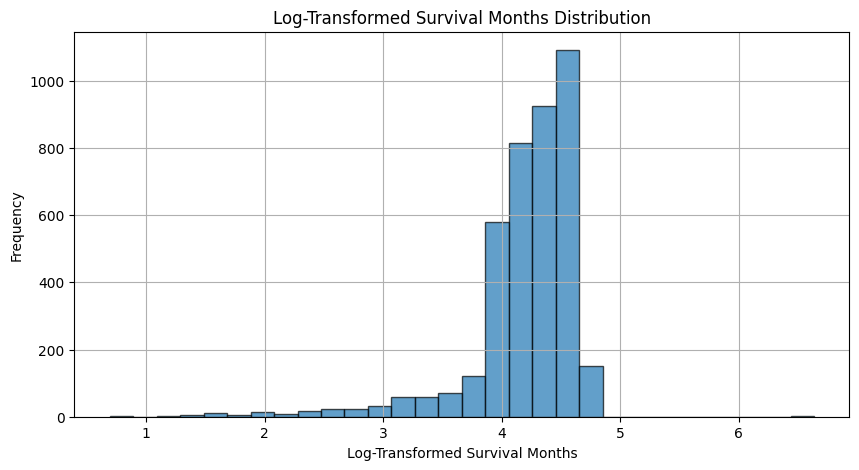

In [ ]:
# Applying logarithmic transformation to normalize survival data
df["Survival_Months"] = np.log1p(df["Survival_Months"])

# Visualizing the transformed distribution
plt.figure(figsize=(10, 5))
plt.hist(df["Survival_Months"], bins=30, edgecolor='black', alpha=0.7)
plt.title("Log-Transformed Survival Months Distribution")
plt.xlabel("Log-Transformed Survival Months")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

*This checks the statistical summary after log transformation. It helps verify the effect of the transformation on the data distribution, particularly whether the skewness has been reduced.*

In [ ]:
# Examining statistics after log transformation
df.describe()

,Age,Grade,Tumor_Size,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Survival_Months_Original
count,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000,4007.00000
mean,53.999251,2.151734,30.377839,14.376092,4.148490,4.202291,71.43973
std,8.983440,0.637829,20.963237,8.133470,5.096685,0.468259,25.38021
min,30.000000,1.000000,1.000000,1.000000,1.000000,0.693147,1.00000
25%,47.000000,2.000000,16.000000,9.000000,1.000000,4.043051,56.00000
50%,54.000000,2.000000,25.000000,14.000000,2.000000,4.304065,73.00000
75%,61.000000,3.000000,38.000000,19.000000,5.000000,4.510860,90.00000
max,89.000000,4.000000,140.000000,61.000000,46.000000,6.634633,760.00000


*This shows unique values in the Sex variable. Understanding how gender is encoded is important for proper preprocessing and interpretation of model results.*

In [ ]:
# Examining gender encoding in the dataset
print(df["Sex"].unique())

['Female' '1']


*This standardizes gender labels and converts them to numeric format. First, it replaces code "1" with the descriptive label "Male". Then it uses LabelEncoder to convert categorical labels to numbers (0, 1), which is required for many machine learning algorithms.*

In [ ]:
# Standardizing and encoding gender variable
from sklearn.preprocessing import LabelEncoder

# Replacing numeric code with descriptive label
df["Sex"] = df["Sex"].replace("1", "Male")

# Converting categorical gender to numeric format
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

print(df["Sex"].value_counts())

Sex
0    3988
1      19
Name: count, dtype: int64


*This creates another boxplot to visualize the survival months after transformation. It helps verify the impact of transformations on the distribution and outliers.*

In [ ]:
# Visualizing distribution after transformations
fig = px.box(df, x="Survival_Months", title="Boxplot of Survival Months")
fig.show()

*This produces final descriptive statistics after all transformations. It provides a comprehensive check of numerical distributions before modeling.*

In [ ]:
# Generating final statistical summary
df.describe()

,Age,Sex,Grade,Tumor_Size,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Survival_Months_Original
count,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000,4007.00000
mean,53.999251,0.004742,2.151734,30.377839,14.376092,4.148490,4.202291,71.43973
std,8.983440,0.068705,0.637829,20.963237,8.133470,5.096685,0.468259,25.38021
min,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.693147,1.00000
25%,47.000000,0.000000,2.000000,16.000000,9.000000,1.000000,4.043051,56.00000
50%,54.000000,0.000000,2.000000,25.000000,14.000000,2.000000,4.304065,73.00000
75%,61.000000,0.000000,3.000000,38.000000,19.000000,5.000000,4.510860,90.00000
max,89.000000,1.000000,4.000000,140.000000,61.000000,46.000000,6.634633,760.00000


*This creates a horizontal boxplot for tumor size distribution. Boxplots help detect extreme values that might need treatment before modeling. Horizontal orientation makes it easier to read specific values.*

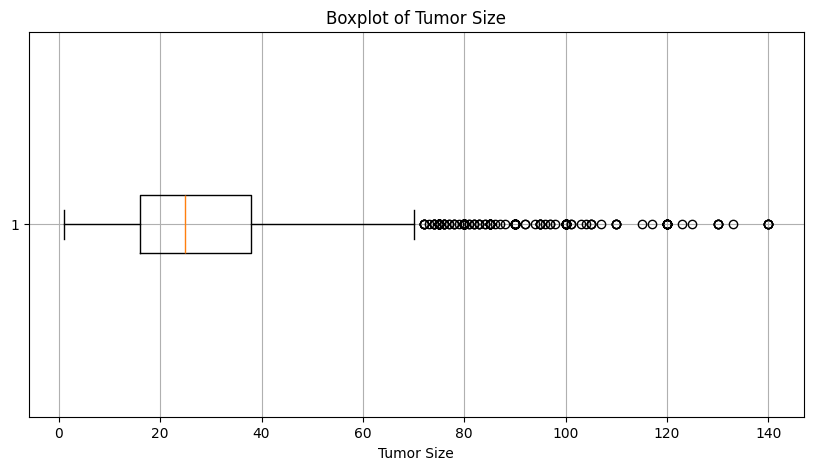

In [ ]:
# Visualizing tumor size distribution to identify outliers
plt.figure(figsize=(10, 5))
plt.boxplot(df["Tumor_Size"], vert=False)
plt.title("Boxplot of Tumor Size")
plt.xlabel("Tumor Size")
plt.grid(True)
plt.show()

*This checks for any remaining missing values after all preprocessing steps. Complete data without missing values is essential for reliable model training.*

In [ ]:
# Verifying complete data after preprocessing
df.isnull().sum()

,0
Age,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0


*This creates a color-coded bar chart showing the distribution of mortality status. Understanding class balance is crucial for classification tasks, as imbalanced classes may require special handling during model training.*

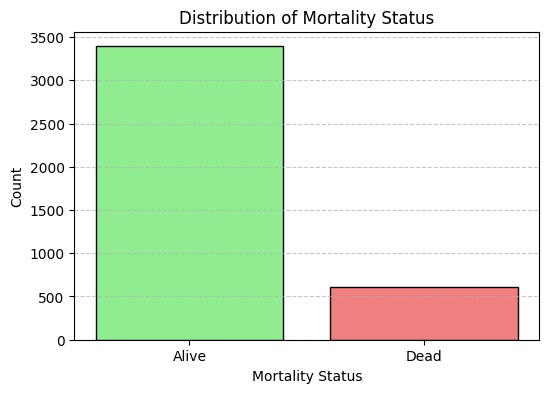

In [ ]:
# Visualizing mortality status distribution
plt.figure(figsize=(6, 4))

# Calculating frequency distribution
mortality_counts = df['Mortality_Status'].value_counts()

# Define custom colors based on status
colors = ['lightgreen' if status.lower() == 'alive' else 'lightcoral' for status in mortality_counts.index]

# Creating bar chart
plt.bar(mortality_counts.index, mortality_counts.values, color=colors, edgecolor='black')

# Configuring visualization
plt.title('Distribution of Mortality Status')
plt.xlabel('Mortality Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*This caps extreme tumor size values at the 99th percentile. Limiting outliers improves model stability by preventing extreme values from having disproportionate influence on the analysis. The boxplot visualizes the distribution after capping.*

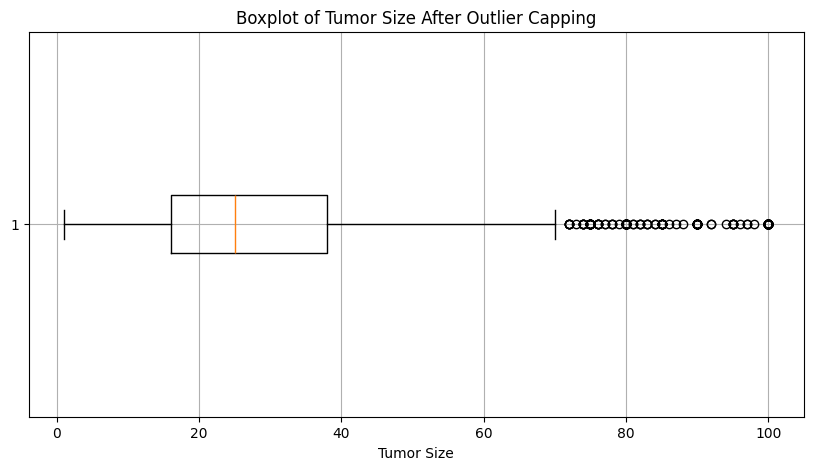

In [ ]:
# Handling extreme tumor size values using percentile capping
upper_limit = df["Tumor_Size"].quantile(0.99)

# Capping outliers to reduce their influence
df["Tumor_Size"] = np.where(df["Tumor_Size"] > upper_limit, upper_limit, df["Tumor_Size"])

# Visualizing distribution after outlier treatment
plt.figure(figsize=(10, 5))
plt.boxplot(df["Tumor_Size"], vert=False)
plt.title("Boxplot of Tumor Size After Outlier Capping")
plt.xlabel("Tumor Size")
plt.grid(True)
plt.show()

*This restores the original, untransformed survival month values. For certain analyses or visualizations, the original scale may be preferable to the log-transformed values.*

In [ ]:
# Restoring original survival month values for specific analyses
df["Survival_Months"] = df["Survival_Months_Original"]

## 8. Saving Processed Data

*This saves the cleaned and processed dataset to Google Drive. Saving the processed data allows future use without repeating the preprocessing steps, ensuring consistency across analyses.*

In [ ]:
# Saving the fully processed dataset to Google Drive
df.to_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/New_Cleaned_Dataset/cleaned_dataset.csv", index=False)

*This loads the processed dataset from the saved file. Loading from file ensures consistency across analytical sessions and verifies that the saved data can be properly retrieved.*

In [ ]:
# Loading the processed dataset for further analysis
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/New_Cleaned_Dataset/cleaned_dataset.csv")

## 9. Preparing Task-Specific Datasets

*This creates a dataset specifically for mortality classification tasks. It removes the survival duration variables to focus on predicting mortality status from the remaining features.*

In [ ]:
# Creating specialized dataset for classification modeling
classification_df = df.drop(columns=["Survival_Months", "Survival_Months_Original"])

*This examines the structure and statistics of the classification dataset. Understanding the feature space is important for selecting appropriate classification algorithms and preprocessing techniques.*

In [ ]:
# Examining the classification dataset structure
classification_df.info()
classification_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4007 non-null   int64  
 1   Sex                     4007 non-null   int64  
 2   T_Stage                 4007 non-null   object 
 3   N_Stage                 4007 non-null   object 
 4   6th_Stage               4007 non-null   object 
 5   Differentiated          4007 non-null   object 
 6   Grade                   4007 non-null   int64  
 7   A_Stage                 4007 non-null   object 
 8   Tumor_Size              4007 non-null   float64
 9   Estrogen_Status         4007 non-null   object 
 10  Progesterone_Status     4007 non-null   object 
 11  Regional_Node_Examined  4007 non-null   int64  
 12  Regional_Node_Positive  4007 non-null   int64  
 13  Mortality_Status        4007 non-null   object 
dtypes: float64(1), int64(5), object(8)
memor

,Age,Sex,Grade,Tumor_Size,Regional_Node_Examined,Regional_Node_Positive
count,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000
mean,53.999251,0.004742,2.151734,30.182181,14.376092,4.148490
std,8.983440,0.068705,0.637829,20.175447,8.133470,5.096685
min,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,0.000000,2.000000,16.000000,9.000000,1.000000
50%,54.000000,0.000000,2.000000,25.000000,14.000000,2.000000
75%,61.000000,0.000000,3.000000,38.000000,19.000000,5.000000
max,89.000000,1.000000,4.000000,100.000000,61.000000,46.000000


*This analyzes categorical variables in the classification dataset. Understanding categorical distributions informs encoding decisions and feature engineering strategies for classification.*

In [ ]:
# Analyzing categorical features in classification dataset
classification_df.describe(include='object')

,T_Stage,N_Stage,6th_Stage,Differentiated,A_Stage,Estrogen_Status,Progesterone_Status,Mortality_Status
count,4007,4007,4007,4007,4007,4007,4007,4007
unique,4,3,5,4,2,2,2,2
top,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive,Alive
freq,1782,2723,1300,2342,3917,3738,3313,3393


*This creates a dataset specifically for survival duration prediction. It removes the categorical outcome and backup columns to focus on predicting survival months as a continuous variable.*

In [ ]:
# Creating specialized dataset for regression modeling
regression_df = df.drop(columns=["Mortality_Status", "Survival_Months_Original"])

*This checks the dimensions (rows, columns) of the regression dataset. Verifying record count ensures sufficient data for building reliable regression models.*

In [ ]:
# Verifying regression dataset dimensions
regression_df.shape

(4007, 14)

*This lists all features available for regression modeling. Understanding available predictors guides feature selection and helps plan the regression modeling approach.*

In [ ]:
# Listing available features for regression modeling
list(regression_df.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Regional_Node_Positive',
 'Survival_Months']

*This saves specialized datasets for classification and regression tasks. Creating separate files simplifies the workflow for different modeling tasks and enables focused analysis for each prediction objective.*

In [ ]:
# Saving task-specific datasets for future modeling
classification_df.to_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/New_Cleaned_Dataset/cleaned_classification_dataset.csv", index=False)
regression_df.to_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/New_Cleaned_Dataset/cleaned_regression_dataset.csv", index=False)

*This displays a confirmation message indicating completion of data preparation. The message confirms that all datasets have been successfully saved and are ready for subsequent modeling stages.*

In [ ]:
# Confirmation of successful dataset preparation
print("Datasets are saved successfully!")

Datasets are saved successfully!
